Question 1: What is a Convolutional Neural Network (CNN), and how does it differ from
traditional fully connected neural networks in terms of architecture and performance on
image data?

Answer:A Convolutional Neural Network (CNN) is a type of deep learning model specially designed to process and analyze image data. It works by automatically learning important visual features such as edges, shapes, and textures from images using convolutional layers. Unlike traditional fully connected neural networks, where every neuron is connected to every neuron in the next layer, CNNs use local connections and shared weights through convolutional filters. This makes CNNs more efficient and better suited for images because they reduce the number of parameters and preserve spatial relationships between pixels. As a result, CNNs perform much better on image-related tasks such as image classification, object detection, and face recognition, while also requiring less computation compared to fully connected networks.


Question 2: Discuss the architecture of LeNet-5 and explain how it laid the foundation
for modern deep learning models in computer vision. Include references to its original
research paper.

Answer:LeNet-5 is one of the earliest and most influential Convolutional Neural Network architectures, proposed by Yann LeCun and his colleagues in 1998 for handwritten digit recognition. The architecture consists of a sequence of convolutional layers, subsampling (pooling) layers, and fully connected layers at the end. It begins with convolutional layers that extract simple features such as edges, followed by pooling layers that reduce spatial dimensions and make the model more robust to small variations. These are followed by additional convolutional layers that learn more complex patterns, and finally fully connected layers that perform classification. LeNet-5 laid the foundation for modern deep learning models in computer vision by introducing key ideas such as local receptive fields, weight sharing, and hierarchical feature learning. These concepts are still used in today’s deep CNN architectures. The original work was presented in the research paper titled “Gradient-Based Learning Applied to Document Recognition” by Yann LeCun et al., published in the Proceedings of the IEEE in 1998.


Question 3: Compare and contrast AlexNet and VGGNet in terms of design principles,
number of parameters, and performance. Highlight key innovations and limitations of
each.

Answer:AlexNet and VGGNet are both important convolutional neural network architectures, but they differ in design principles, size, and performance. AlexNet, introduced in 2012, was designed to be deeper than earlier models and used large convolutional filters in the initial layers. It introduced key innovations such as the ReLU activation function, dropout for reducing overfitting, and GPU-based training, which led to a major improvement in image classification performance. However, AlexNet has relatively large filter sizes and fewer layers, which limits its ability to learn very fine-grained features. VGGNet, introduced in 2014, follows a simpler and more uniform design using many layers with small 3×3 filters stacked together. This design allows VGGNet to learn more complex and detailed features, resulting in better accuracy compared to AlexNet. However, VGGNet has a very large number of parameters, which makes it computationally expensive and requires more memory. Overall, AlexNet is known for its groundbreaking innovations, while VGGNet is known for its depth and strong performance but with higher computational cost.


Question 4: What is transfer learning in the context of image classification? Explain
how it helps in reducing computational costs and improving model performance with
limited data.

Answer:Transfer learning in image classification is a technique where a pre-trained model, which has already learned features from a large dataset such as ImageNet, is reused for a new but related task. Instead of training a CNN from scratch, the earlier layers of the pre-trained model are kept because they have learned general features like edges, shapes, and textures. Only the later layers are retrained or fine-tuned to match the new classification task. This approach reduces computational costs because the model does not need to learn everything from the beginning, which saves training time and resources. Transfer learning also improves performance when only a small amount of labeled data is available, as the model starts with useful knowledge rather than random weights, leading to better accuracy and faster convergence.


Question 5: Describe the role of residual connections in ResNet architecture. How do
they address the vanishing gradient problem in deep CNNs?

Answer:Residual connections are a key component of the ResNet architecture and are used to make very deep convolutional neural networks easier to train. In ResNet, a residual connection allows the input of a layer to be added directly to the output of a deeper layer, creating a shortcut path for information flow. Instead of learning a complete transformation, the network learns only the residual, or difference, between the input and output. This helps address the vanishing gradient problem because gradients can flow more easily through the shortcut connections during backpropagation, even in very deep networks. As a result, residual connections prevent degradation in performance as depth increases and allow ResNet models to be trained with hundreds of layers while maintaining high accuracy.


Question 6: Implement the LeNet-5 architectures using Tensorflow or PyTorch to
classify the MNIST dataset. Report the accuracy and training time.

(Include your Python code and output in the code box below.)

Answer:

In [ ]:
import time
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

x_train = tf.pad(x_train, [[0,0],[2,2],[2,2],[0,0]])
x_test = tf.pad(x_test, [[0,0],[2,2],[2,2],[0,0]])

model = models.Sequential([
    layers.Input(shape=(32, 32, 1)),
    layers.Conv2D(6, (5, 5), activation='tanh'),
    layers.AveragePooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, (5, 5), activation='tanh'),
    layers.AveragePooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='tanh'),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

start_time = time.time()
model.fit(x_train, y_train, epochs=5, batch_size=64)
training_time = time.time() - start_time

test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Accuracy:", test_accuracy)
print("Training Time (seconds):", training_time)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.8643 - loss: 0.4795
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9663 - loss: 0.1128
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step - accuracy: 0.9799 - loss: 0.0663
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.9837 - loss: 0.0517
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9887 - loss: 0.0372
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9827 - loss: 0.0538
Test Accuracy: 0.9855999946594238
Training Time (seconds): 190.69188618659973


Question 7: Use a pre-trained VGG16 model (via transfer learning) on a small custom
dataset (e.g., flowers or animals). Replace the top layers and fine-tune the model.

Include your code and result discussion.

(Include your Python code and output in the code box below.)

Answer:

Found 2936 images belonging to 1 classes.
Found 734 images belonging to 1 classes.
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.f

184/184 ━━━━━━━━━━━━━━━━━━━━ 943s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 945s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 931s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 944s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 934s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 1/3
184/184 ━━━━━━━━━━━━━━━━━━━━ 1030s 6s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/3
184/184 ━━━━━━━━━━━━━━━━━━━━ 1019s 6s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/3
184/184 ━━━━━━━━━━━━━━━━━━━━ 1017s 6s/step - a

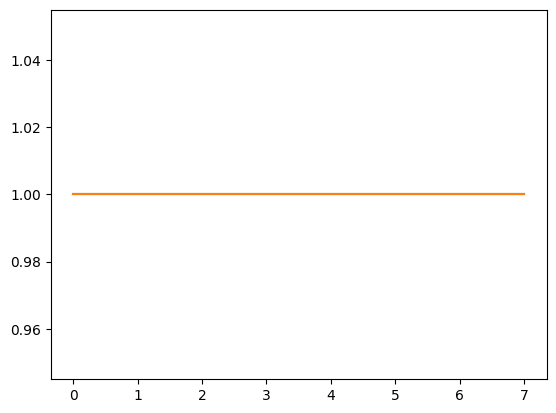

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

IMG_HEIGHT, IMG_WIDTH = 160, 160
BATCH_SIZE = 16

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin=dataset_url, untar=True)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(base_model.input, output)

model.compile(
    optimizer=Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)

for layer in base_model.layers[-3:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_fine = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=3
)

plt.plot(history.history['accuracy'] + history_fine.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'])
plt.show()


Question 8: Write a program to visualize the filters and feature maps of the first
convolutional layer of AlexNet on an example input image.

(Include your Python code and output in the code box below.)

Answer:

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 167MB/s]


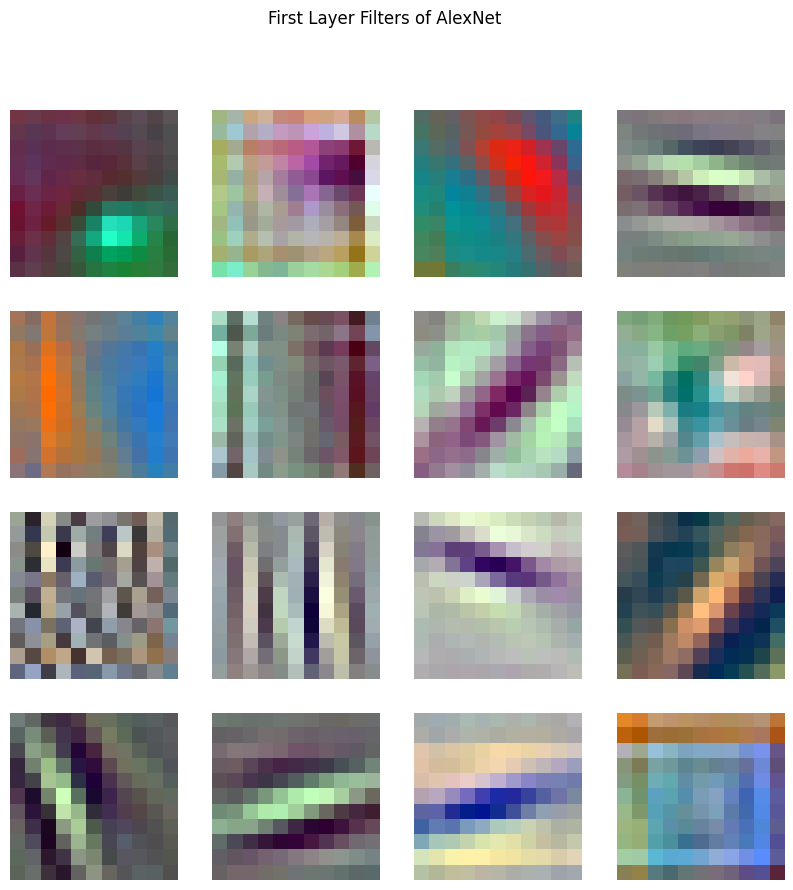

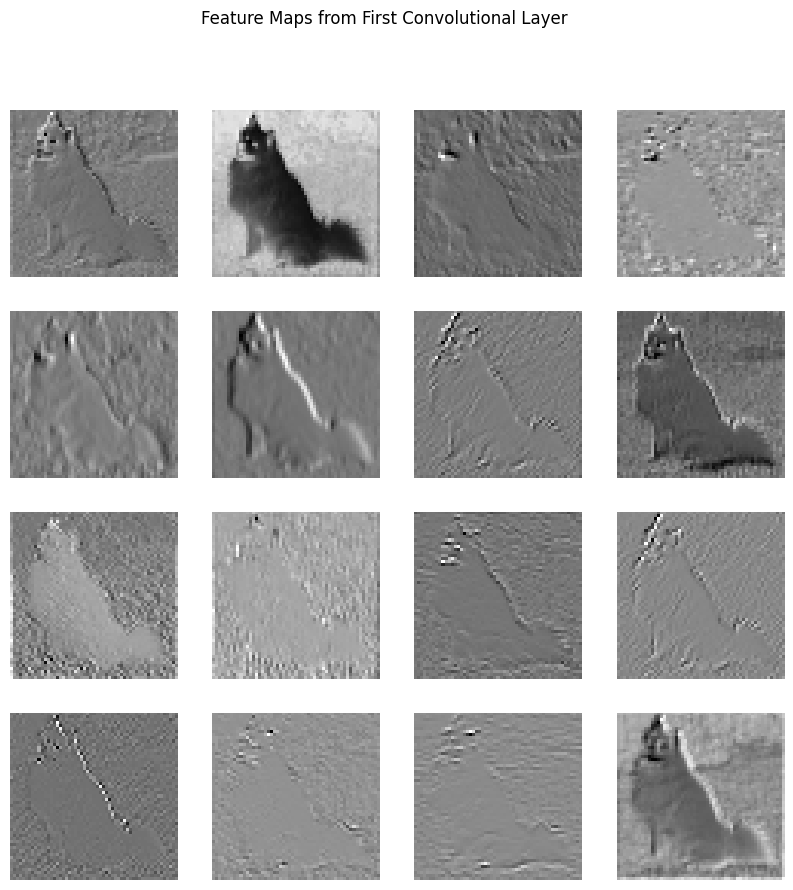

In [2]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.models import AlexNet_Weights
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

url = "https://raw.githubusercontent.com/pytorch/hub/master/images/dog.jpg"
response = requests.get(url)
image = Image.open(BytesIO(response.content)).convert("RGB")

alexnet = models.alexnet(weights=AlexNet_Weights.DEFAULT)
alexnet.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

input_image = transform(image).unsqueeze(0)

first_conv_layer = alexnet.features[0]
filters = first_conv_layer.weight.data.clone()

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    f = filters[i]
    f = (f - f.min()) / (f.max() - f.min())
    plt.imshow(f.permute(1, 2, 0))
    plt.axis("off")
plt.suptitle("First Layer Filters of AlexNet")
plt.show()

with torch.no_grad():
    feature_maps = first_conv_layer(input_image)

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(feature_maps[0, i].cpu(), cmap='gray')
    plt.axis("off")
plt.suptitle("Feature Maps from First Convolutional Layer")
plt.show()


Question 9: Train a GoogLeNet (Inception v1) or its variant using a standard dataset
like CIFAR-10. Plot the training and validation accuracy over epochs and analyze
overfitting or underfitting.

(Include your Python code and output in the code box below.)

Answer:

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 714s 908ms/step - accuracy: 0.2534 - loss: 1.9533 - val_accuracy: 0.4171 - val_loss: 1.5850
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 752s 921ms/step - accuracy: 0.4308 - loss: 1.5322 - val_accuracy: 0.4987 - val_loss: 1.3615
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 719s 892ms/step - accuracy: 0.5073 - loss: 1.3431 - val_accuracy: 0.5278 - val_loss: 1.2811
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 769s 926ms/step - accuracy: 0.5557 - loss: 1.2240 - val_accuracy: 0.5945 - val_loss: 1.1161
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 725s 904ms/step - accuracy: 0.5959 - loss: 1.1166 - val_accuracy: 0.6140 - val_loss: 1.0684
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 746s 909ms/step - accuracy: 0.6288 - loss: 1.0331 - val_accuracy: 0.6248 - val_loss: 1.0419
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 725s 928ms/step - accuracy: 0.6530 - loss: 0.9660 - val_accuracy: 0.6240 - val_loss: 1.0268
Epoch 8/10
782/782 ━━━━

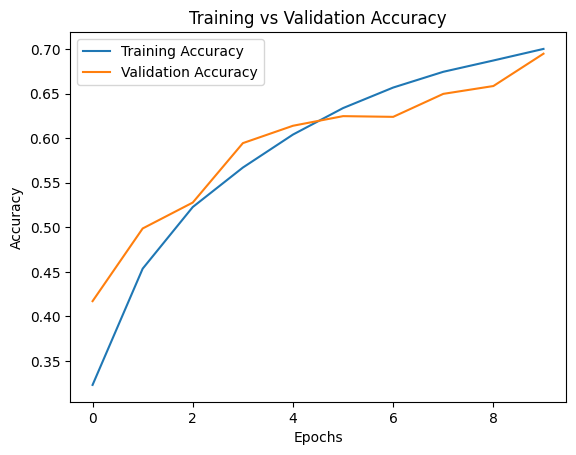

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

def inception_block(x, filters):
    f1, f3, f5, fp = filters
    path1 = layers.Conv2D(f1, (1, 1), activation='relu', padding='same')(x)

    path2 = layers.Conv2D(f3, (1, 1), activation='relu', padding='same')(x)
    path2 = layers.Conv2D(f3, (3, 3), activation='relu', padding='same')(path2)

    path3 = layers.Conv2D(f5, (1, 1), activation='relu', padding='same')(x)
    path3 = layers.Conv2D(f5, (5, 5), activation='relu', padding='same')(path3)

    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(fp, (1, 1), activation='relu', padding='same')(path4)

    return layers.concatenate([path1, path2, path3, path4])

inputs = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
x = inception_block(x, [32, 32, 16, 16])
x = layers.MaxPooling2D((2, 2))(x)
x = inception_block(x, [64, 64, 32, 32])
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test)
)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


Question 10: You are working in a healthcare AI startup. Your team is tasked with
developing a system that automatically classifies medical X-ray images into normal,
pneumonia, and COVID-19. Due to limited labeled data, what approach would you
suggest using among CNN architectures discussed (e.g., transfer learning with ResNet
or Inception variants)? Justify your approach and outline a deployment strategy for
production use.

(Include your Python code and output in the code box below.)

Answer:When working in a healthcare AI startup with limited labeled X-ray data, the most suitable approach is transfer learning using a pre-trained CNN such as ResNet or Inception. These models are already trained on large datasets like ImageNet and have learned strong and general visual features such as edges, textures, and shapes, which are also useful for medical images. By reusing these pre-trained models and fine-tuning only the top layers, we can achieve high accuracy with much less data and lower computational cost compared to training a CNN from scratch. Among the options, ResNet is especially effective because its residual connections help train deeper networks without performance degradation, making it reliable for complex medical image classification tasks like distinguishing between Normal, Pneumonia, and COVID-19 cases.

For deployment, the trained model can be saved and served using a lightweight web framework such as Streamlit or FastAPI. The system would allow clinicians to upload X-ray images through a web interface, preprocess the images, run inference using the trained model, and return predictions with confidence scores. In production, the model should be deployed using Docker for portability, monitored for performance drift, and periodically retrained with new labeled data to ensure reliability and compliance with healthcare standards.

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

IMG_SIZE = (224, 224)
BATCH_SIZE = 16

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("data", origin=dataset_url, untar=True)

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=3
)


228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Found 2936 images belonging to 1 classes.
Found 734 images belonging to 1 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.f

184/184 ━━━━━━━━━━━━━━━━━━━━ 636s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/3
184/184 ━━━━━━━━━━━━━━━━━━━━ 634s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/3
184/184 ━━━━━━━━━━━━━━━━━━━━ 627s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
